<a href="https://colab.research.google.com/github/devipuspitaaa/ProjectPCVK_DeviFitri/blob/main/ProjectPCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import cv2 as cv
from PIL import Image




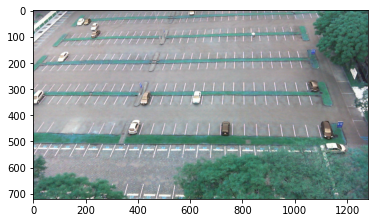

In [3]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-11-09_06_56_32.jpg')
image_arr = np.array(image)
plt.imshow(image)
plt.show()

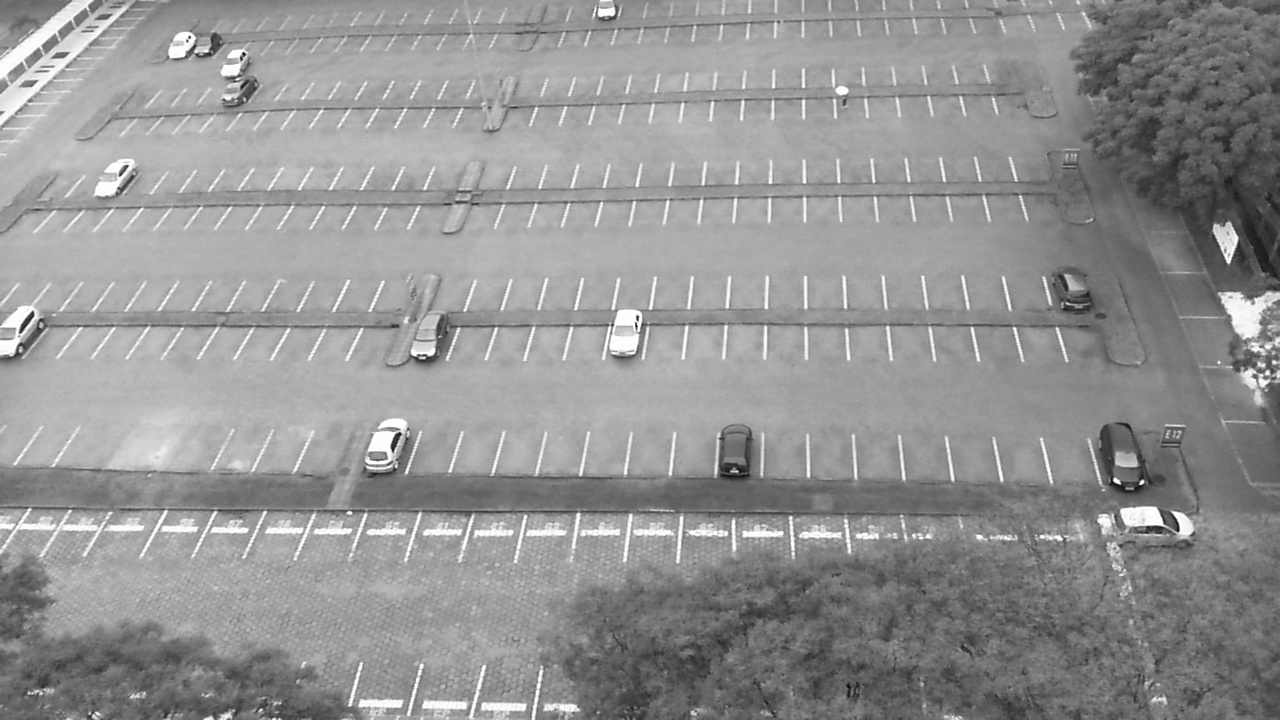

In [4]:
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

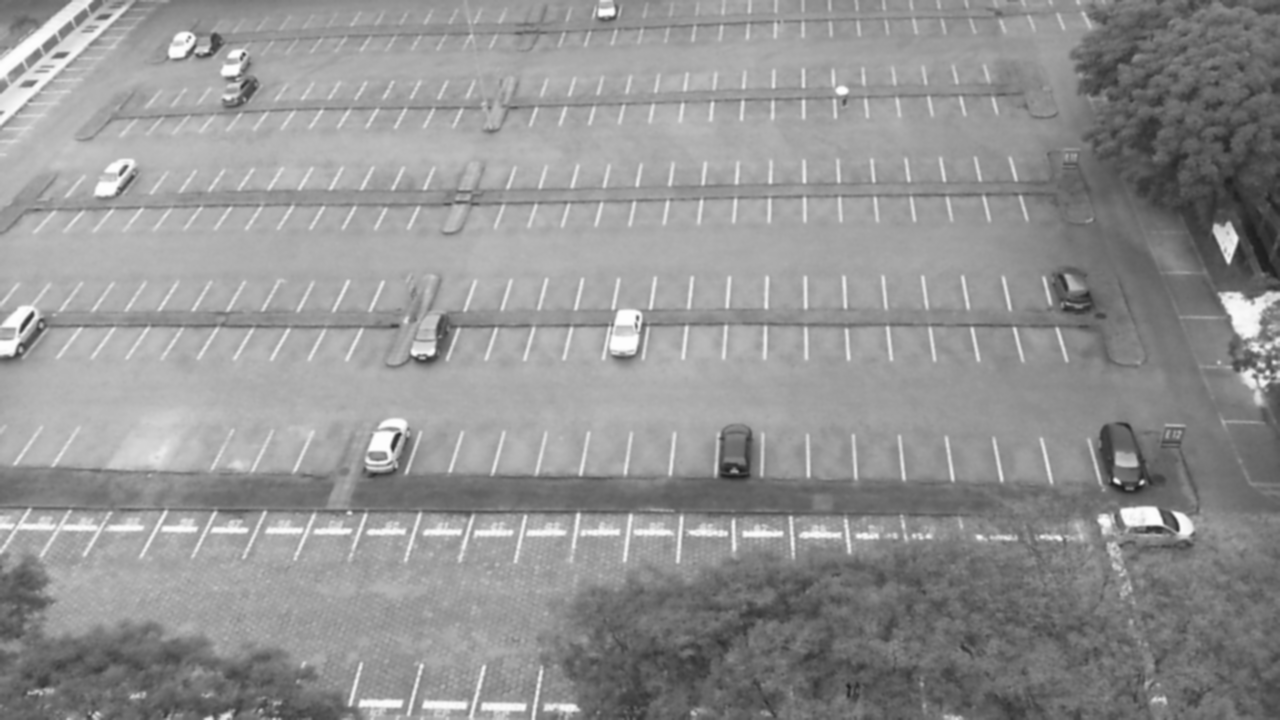

In [5]:
# Gaussian Blur
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

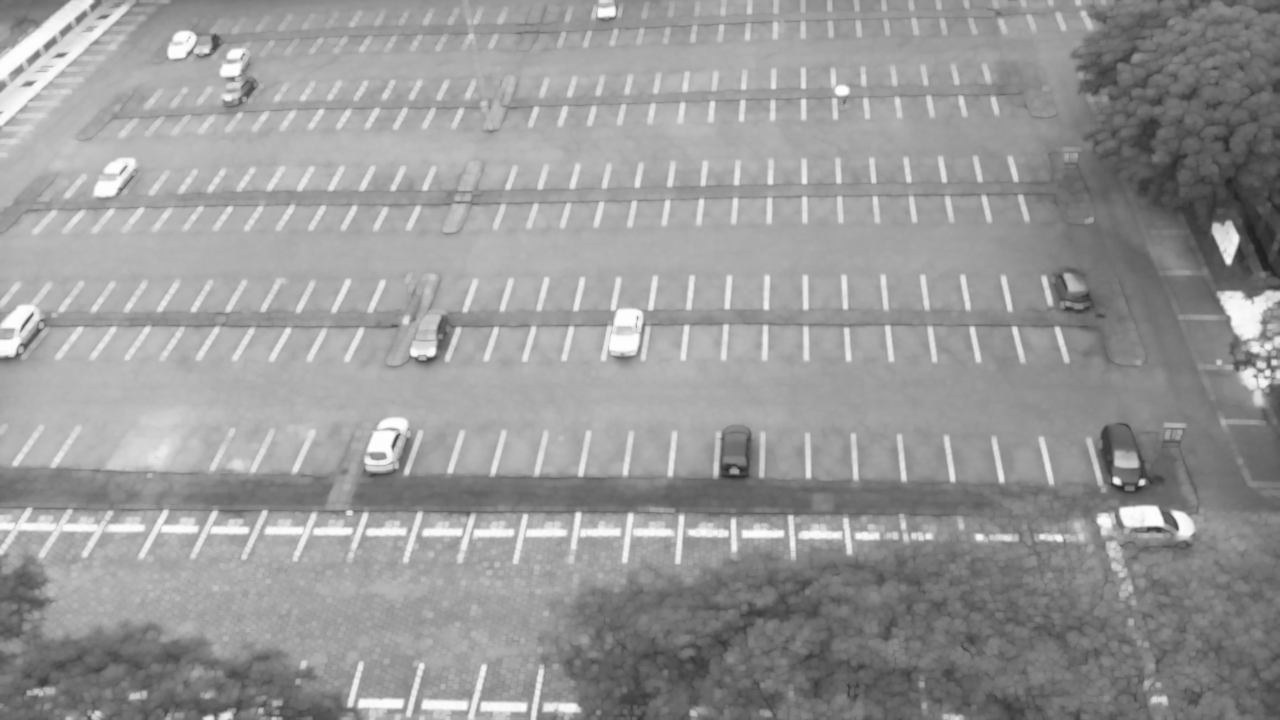

In [6]:
# Dilasi
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

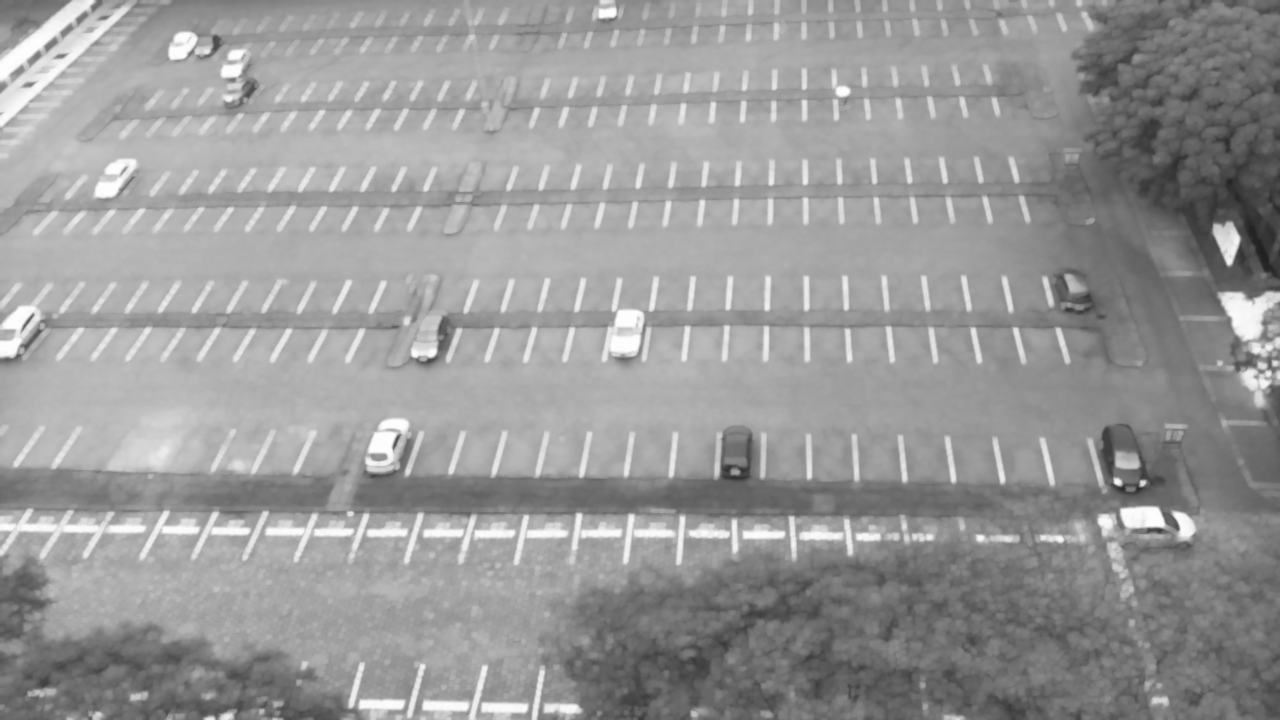

In [7]:
# Closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Cascade Cars

4  cars found


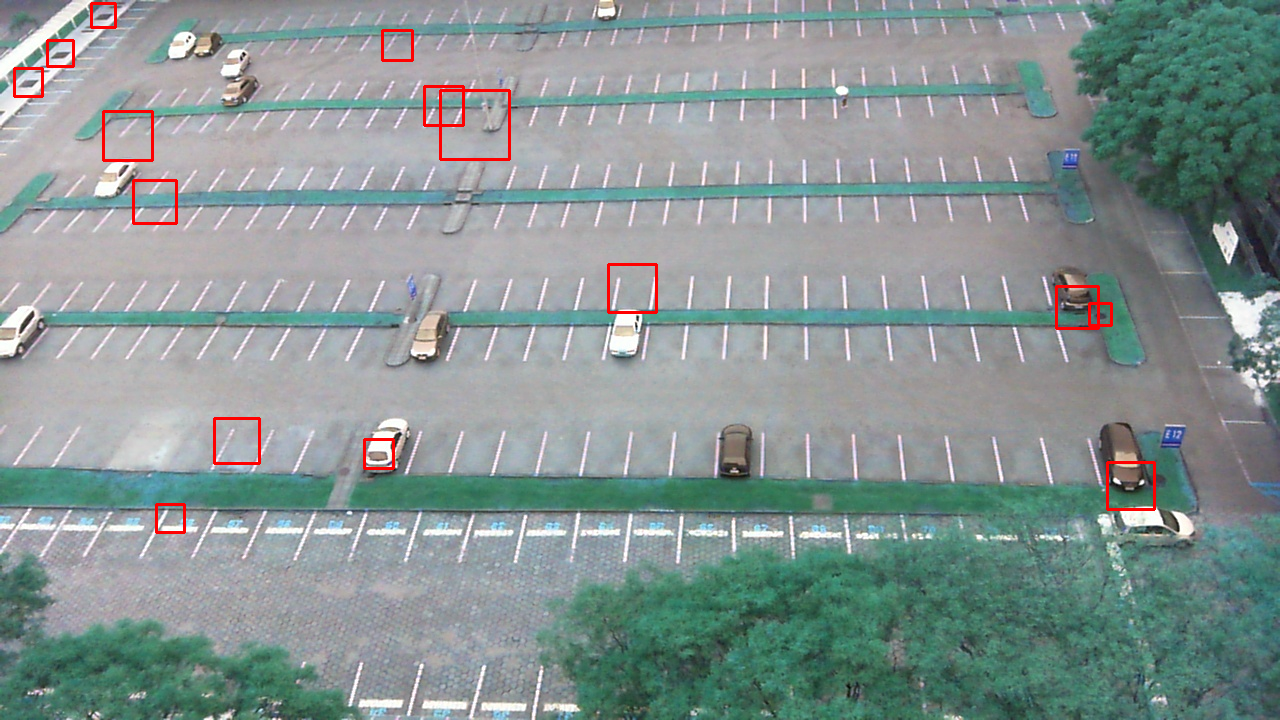

In [13]:
# Cascade Cars
car_cascade_src = '/content/drive/MyDrive/PCVK_MM/Images/Car Park/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 5)


cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

15  cars found


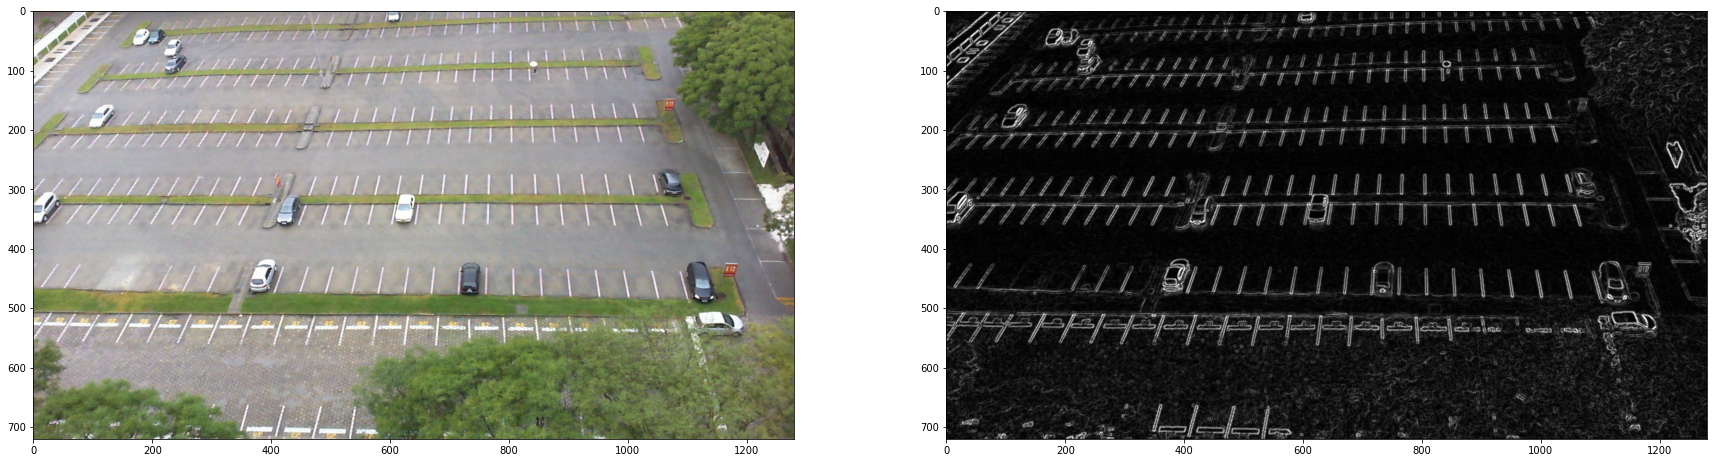

In [9]:
img0 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-11-09_06_56_32.jpg') 


# Converting to Gray Scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Remove Noise
img = cv.GaussianBlur(gray,(3,3),0)

# Memperoleh pemfilteran Sobel Horizontal dan Vertikal dari gambar
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# gambar dengan kernel Sobel horizontal dan vertikal diterapkan
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)
car_cascade_src = '/content/drive/MyDrive/PCVK_MM/Images/Car Park/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)


cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")

f, axarr = plt. subplots(1,2,figsize=(30,15))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))

5  Mobil ditemukan



<Figure size 720x720 with 0 Axes>

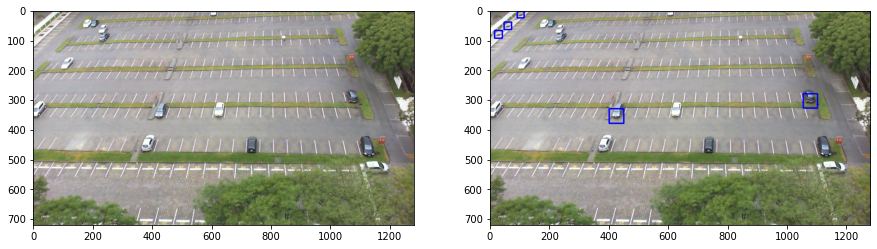

In [11]:
cascade_mobil = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/Car Park/cars3.xml')

# Coba Deteksi
imege = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-11-09_06_56_32.jpg')
imege1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-11-09_06_56_32.jpg')
roi_wajah1 = cascade_mobil.detectMultiScale(imege1)

# ke Gray Scale
gray = cv.cvtColor(imege, cv.COLOR_BGR2GRAY)

# kurangi Noise
img = cv.GaussianBlur(gray,(3,3),0)

# Memperoleh pemfilteran Sobel Horizontal dan Vertikal dari gambar
img_sobelx = cv.Sobel(imege, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imege, cv.CV_64F, 0, 1, ksize=3)

# gambar dengan kernel Sobel horizontal dan vertikal diterapkan
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# mengonversi kembali ke uint8
filtered_image = cv.convertScaleAbs(filtered_image)


edges = cv.Canny(img,100,200)
jumlah = 0
car_det = cascade_mobil.detectMultiScale(imege) 
for(x,y,w,h) in car_det: 
 cv.rectangle(imege,(x,y),(x+w,y+h),(255,0,0),3) 
 jumlah += 1
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(imege1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(imege1, cv.COLOR_BGR2RGB))
print(jumlah, " Mobil ditemukan")
print()
plt.subplot(122),plt.imshow(cv.cvtColor(imege, cv.COLOR_BGR2RGB),cmap = 'gray')
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))


plt.show()